# Read and concatenate Chicago Crime Data


In [1]:
import pandas as pd
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticks
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [2]:
# function for formatting money in thousands
def thousands(x, pos):
    xk = x/1000
    return f"${xk:,.0f}K"
str_fmt = mticks.FuncFormatter(thousands)

In [3]:
# find all csv file under Data/Chicago folder
path = 'Data/Chicago'
csv_files = glob.glob(path + "/*.csv")
csv_files.sort()
print(csv_files)

['Data/Chicago/Chicago-Crime_2001.csv', 'Data/Chicago/Chicago-Crime_2002.csv', 'Data/Chicago/Chicago-Crime_2003.csv', 'Data/Chicago/Chicago-Crime_2004.csv', 'Data/Chicago/Chicago-Crime_2005.csv', 'Data/Chicago/Chicago-Crime_2006.csv', 'Data/Chicago/Chicago-Crime_2007.csv', 'Data/Chicago/Chicago-Crime_2008.csv', 'Data/Chicago/Chicago-Crime_2009.csv', 'Data/Chicago/Chicago-Crime_2010.csv', 'Data/Chicago/Chicago-Crime_2011.csv', 'Data/Chicago/Chicago-Crime_2012.csv', 'Data/Chicago/Chicago-Crime_2013.csv', 'Data/Chicago/Chicago-Crime_2014.csv', 'Data/Chicago/Chicago-Crime_2015.csv', 'Data/Chicago/Chicago-Crime_2016.csv', 'Data/Chicago/Chicago-Crime_2017.csv', 'Data/Chicago/Chicago-Crime_2018.csv', 'Data/Chicago/Chicago-Crime_2019.csv', 'Data/Chicago/Chicago-Crime_2020.csv', 'Data/Chicago/Chicago-Crime_2021.csv', 'Data/Chicago/Chicago-Crime_2022.csv', 'Data/Chicago/Chicago-Crime_2023.csv']


In [4]:
# read and merge all csv_files
df = pd.concat([pd.read_csv(file) for file in csv_files ], ignore_index=True)
display(df.head(),df.tail())

/var/folders/dj/tq7kx_ys6m161zqrzvh_73q80000gn/T/ipykernel_41271/4248295058.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(file) for file in csv_files ], ignore_index=True)


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,3723059,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,732.00,7.00,6.00,41.77,-87.64
1,1322043,01/01/2001 12:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825.00,8.00,NaN,41.78,-87.68
2,1968773,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,"2,022.00",20.00,NaN,41.99,-87.66
3,5952122,01/01/2001 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,"1,431.00",14.00,1.00,41.92,-87.70
4,1312179,01/01/2001 12:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,"1,533.00",15.00,NaN,41.87,-87.75


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
7029995,13120947,06/26/2023 11:42:00 PM,THEFT,$500 AND UNDER,APARTMENT,False,False,321.00,3.00,20.00,41.77,-87.61
7029996,13120829,06/26/2023 11:43:00 PM,THEFT,RETAIL THEFT,GAS STATION,False,False,923.00,9.00,14.00,41.79,-87.69
7029997,13120830,06/26/2023 11:46:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,932.00,9.00,16.00,41.80,-87.68
7029998,13120820,06/26/2023 11:50:00 PM,PUBLIC PEACE VIOLATION,OTHER VIOLATION,CTA PLATFORM,False,False,123.00,1.00,34.00,41.88,-87.63
7029999,13120824,06/26/2023 11:59:00 PM,ROBBERY,ARMED - HANDGUN,RESTAURANT,False,False,"2,423.00",24.00,49.00,42.01,-87.67


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030000 entries, 0 to 7029999
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                object 
 6   Domestic              object 
 7   Beat                  float64
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: float64(5), int64(1), object(6)
memory usage: 643.6+ MB


# Create two forms of data


In [6]:
# Original format: convert Date to datetime dtype
df['Date'] = pd.to_datetime(df['Date'],
                           format = '%m/%d/%Y %I:%M:%S %p')

# set the datetime column as the index
df = df.set_index('Date')
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,3723059,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,732.00,7.00,6.00,41.77,-87.64
2001-01-01,1322043,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825.00,8.00,NaN,41.78,-87.68
2001-01-01,1968773,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,"2,022.00",20.00,NaN,41.99,-87.66
2001-01-01,5952122,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,"1,431.00",14.00,1.00,41.92,-87.70
2001-01-01,1312179,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,"1,533.00",15.00,NaN,41.87,-87.75


In [7]:
# A resampled/converted crime counts version 
# alternate code:
resampled_df = df.copy()
# add 'Count' column with 1 for each row
resampled_df['Count'] = 1
# resample and count with .sum()
resampled_df = resampled_df.resample('D').sum(numeric_only = True)
#resampled_df = resampled_df.resample('D').sum(numeric_only = False)

# check
resampled_df.head()

,ID,Beat,District,Ward,Latitude,Longitude,Count
Date,,,,,,,
2001-01-01,4011740634,"2,267,987.00","21,147.00","8,194.00","72,641.08","-152,199.72",1825
2001-01-02,1545846568,"1,404,493.00","12,797.00",147.00,"47,664.67","-99,856.85",1143
2001-01-03,1542074517,"1,462,886.00","13,359.00",132.00,"48,045.81","-100,651.35",1151
2001-01-04,1555657957,"1,397,040.00","12,994.00",0.00,"48,785.52","-102,222.92",1166
2001-01-05,1701884634,"1,530,155.00","14,044.00",156.00,"52,769.46","-110,554.59",1267


# Topic 1) Comparing Police Districts:


## Which district has the most crimes? Which has the least?

In [8]:
# create a barplot function
def plot_bar(df, y_column, pale, yticks, ylab):
  fig, axes = plt.subplots(nrows=1, figsize=(15,5), sharex=True)
  g = sns.countplot(data=df, y=y_column, 
              palette=pale, order = df[y_column].value_counts().index)
  g.set(yticklabels=yticks);
  g.set_xlabel('Counts');
  g.set_ylabel(ylab);
  g.set_title(f'Count of Each {ylab}', fontsize=14, weight = 'bold');

  total = float(len(df))
  for p in g.patches:
      count = round(p.get_width())
      y = p.get_y() + p.get_height()-0.3
      x = p.get_width()
      g.annotate(count, (x, y),ha='left')
        
  FOLDER = "PNG/"
  isExist = os.path.exists(FOLDER)
    
  if isExist == False:  
      os.makedirs(FOLDER, exist_ok=True)
        
  plt.savefig(f'{FOLDER}/{y_column}_barplot.png',bbox_inches='tight')

  return fig,g

In [9]:
# number of crimes per district
count_by_dis = df['District'].value_counts().rename_axis('District').to_frame('Count')
count_by_dis = count_by_dis.reset_index()
display(count_by_dis.head(1),count_by_dis.tail(1))

,District,Count
0,8.00,473042


,District,Count
23,21.00,4


In [10]:
# create a barplot for district column
yticks = count_by_dis['District']
pale = sns.color_palette("Set3", count_by_dis.shape[0])
pale

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883),
 (0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

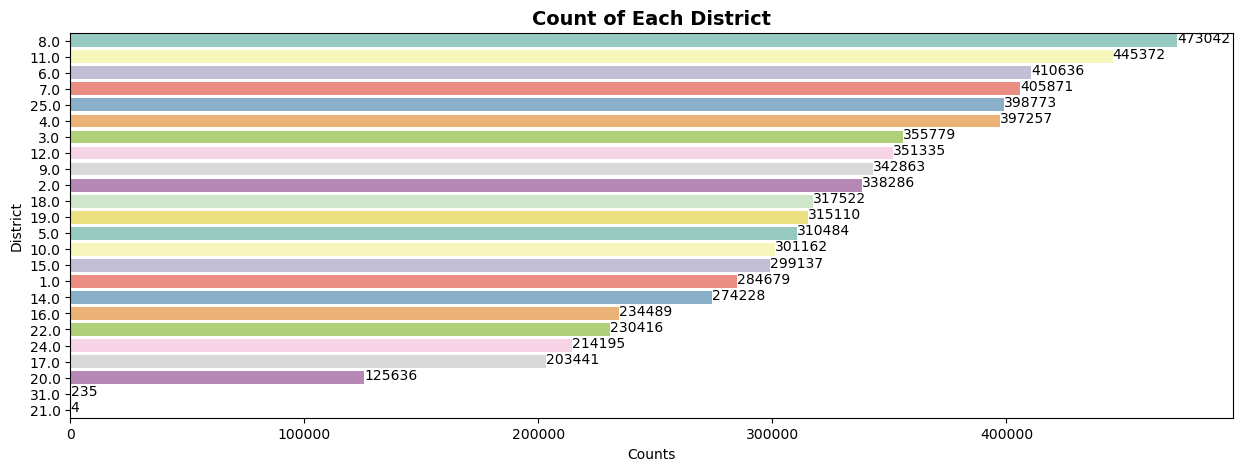

In [11]:
# plot crime counts by district
plot_bar(df,
         y_column='District',
         pale=pale, yticks = yticks, ylab = 'District');

District 8 and 21 are the most and least cases in this time period.

# Topic 2) Crimes Across the Years:


## Is the total number of crimes increasing or decreasing across the years?


In [12]:
# resample resampled_df from daily to yearly
crime_year = resampled_df.resample('AS')['Count'].sum().reset_index()
crime_year['Date'] = pd.to_datetime(crime_year['Date'])
crime_year = crime_year.set_index('Date')
crime_year

,Count
Date,
2001-01-01,485754
2002-01-01,486799
2003-01-01,475972
2004-01-01,469402
2005-01-01,453753
2006-01-01,448168
2007-01-01,437068
2008-01-01,427161
2009-01-01,392816


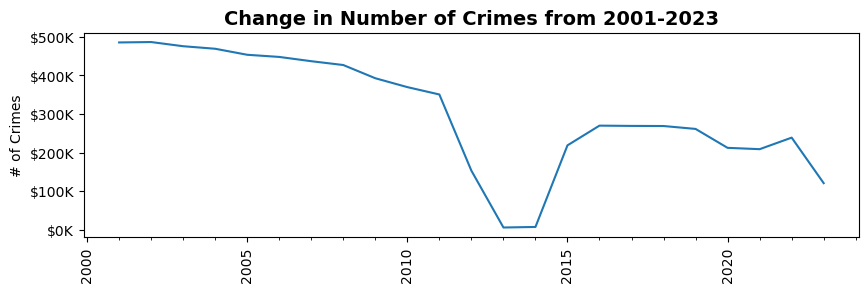

In [13]:
# plot new yearly resampled_df

## create tick locators and formatters
loc_5year = mdates.YearLocator(5)
fmt_year = mdates.DateFormatter("%Y")
loc_year = mdates.YearLocator(1)

plt.rcParams['figure.figsize'] = (10,3)
fig, ax = plt.subplots()
ax.plot(crime_year.index, crime_year.values)

ax.set_title('Change in Number of Crimes from 2001-2023', fontsize=14, weight = 'bold')
ax.set_ylabel('# of Crimes')

ax.xaxis.set_major_locator(loc_5year)
ax.xaxis.set_major_formatter(fmt_year)
ax.xaxis.set_minor_locator(loc_year)

ax.yaxis.set_major_formatter(str_fmt)

fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90, ha = 'center')

In [14]:
## save to PNG
FOLDER = 'PNG/'
fig.savefig(f'{FOLDER}/change-crime-yearly.png',bbox_inches='tight')

from the plot above, we can see the number of crimes does not increase across the year. There was a significant drop on 2013 and 2014 with less than 7000 crimes, and then on 2015 the number climbs back to 20000 crimes. After that, another tick on 2022. Overall, it is a decreasing trend.

## Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [15]:
# use original df where each row is a crime
# add a count columns to be used later
df['Count'] = 1
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7030000 entries, 2001-01-01 00:00:00 to 2023-06-26 23:59:00
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                object 
 5   Domestic              object 
 6   Beat                  float64
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
 11  Count                 int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 697.3+ MB
None


,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Count
Date,,,,,,,,,,,,
2001-01-01,3723059,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,732.00,7.00,6.00,41.77,-87.64,1
2001-01-01,1322043,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825.00,8.00,NaN,41.78,-87.68,1
2001-01-01,1968773,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,"2,022.00",20.00,NaN,41.99,-87.66,1
2001-01-01,5952122,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,"1,431.00",14.00,1.00,41.92,-87.70,1
2001-01-01,1312179,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,"1,533.00",15.00,NaN,41.87,-87.75,1


In [16]:
# create a yearly data and groupby each Primary Type
# Resample the dataframe grouped by month
#crime_year_type = df.groupby(['Primary Type']).resample('A')['Count'].sum().reset_index()
crime_year_type = df.groupby(['Primary Type']).resample('A')['Count'].sum()
crime_year_type

Primary Type       Date      
ARSON              2001-12-31    1011
                   2002-12-31    1032
                   2003-12-31     955
                   2004-12-31     778
                   2005-12-31     691
                                 ... 
WEAPONS VIOLATION  2019-12-31    6339
                   2020-12-31    8432
                   2021-12-31    8980
                   2022-12-31    8766
                   2023-12-31    4203
Name: Count, Length: 748, dtype: int64

In [17]:
crime_year_type.index

MultiIndex([(            'ARSON', '2001-12-31'),
            (            'ARSON', '2002-12-31'),
            (            'ARSON', '2003-12-31'),
            (            'ARSON', '2004-12-31'),
            (            'ARSON', '2005-12-31'),
            (            'ARSON', '2006-12-31'),
            (            'ARSON', '2007-12-31'),
            (            'ARSON', '2008-12-31'),
            (            'ARSON', '2009-12-31'),
            (            'ARSON', '2010-12-31'),
            ...
            ('WEAPONS VIOLATION', '2014-12-31'),
            ('WEAPONS VIOLATION', '2015-12-31'),
            ('WEAPONS VIOLATION', '2016-12-31'),
            ('WEAPONS VIOLATION', '2017-12-31'),
            ('WEAPONS VIOLATION', '2018-12-31'),
            ('WEAPONS VIOLATION', '2019-12-31'),
            ('WEAPONS VIOLATION', '2020-12-31'),
            ('WEAPONS VIOLATION', '2021-12-31'),
            ('WEAPONS VIOLATION', '2022-12-31'),
            ('WEAPONS VIOLATION', '2023-12-31')],
   

In [18]:
crime_year_type_unstacked = crime_year_type.unstack(level=0)
crime_year_type_unstacked.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-12-31,"1,011.00","31,384.00","93,460.00","26,014.00",1.00,"1,779.00","55,858.00",29.00,"13,241.00","14,948.00",1.00,934.00,536.00,NaN,406.00,279.00,933.00,"1,637.00","27,553.00","50,567.00",NaN,NaN,NaN,19.00,"2,264.00",6.00,"29,663.00","6,026.00",9.00,"2,750.00",8.00,"18,441.00","2,239.00",204.00,"99,277.00","4,277.00"
2002-12-31,"1,032.00","31,523.00","94,152.00","25,623.00",0.00,"1,807.00","55,941.00",27.00,"13,880.00","13,731.00",NaN,971.00,658.00,NaN,361.00,337.00,829.00,"1,414.00","25,120.00","51,789.00",NaN,NaN,NaN,26.00,"2,592.00",5.00,"32,599.00","6,407.00",8.00,"2,457.00",2.00,"18,523.00","2,173.00",200.00,"98,331.00","4,281.00"
2003-12-31,955.00,"29,476.00","88,375.00","25,157.00",0.00,"1,571.00","55,010.00",41.00,"14,807.00","13,459.00",NaN,"1,088.00",604.00,NaN,408.00,364.00,705.00,"1,311.00","22,748.00","54,288.00",NaN,1.00,NaN,16.00,"3,047.00",2.00,"31,147.00","6,212.00",6.00,"2,430.00",2.00,"17,332.00","2,078.00",247.00,"98,874.00","4,211.00"
2004-12-31,778.00,"28,850.00","87,135.00","24,563.00",0.00,"1,539.00","53,161.00",40.00,"15,912.00","13,254.00",NaN,"1,122.00",455.00,NaN,531.00,349.00,482.00,985.00,"22,805.00","57,054.00",NaN,0.00,NaN,13.00,"3,099.00",9.00,"29,530.00","7,475.00",9.00,"2,495.00",1.00,"15,977.00","1,805.00",215.00,"95,461.00","4,298.00"
2005-12-31,691.00,"27,067.00","83,962.00","25,500.00",0.00,"1,521.00","54,547.00",36.00,"16,655.00","13,590.00",NaN,"1,078.00",453.00,NaN,615.00,258.00,389.00,"1,005.00","22,496.00","56,229.00",NaN,0.00,NaN,19.00,"2,904.00",9.00,"28,027.00","6,123.00",4.00,"2,730.00",2.00,"16,047.00","1,815.00",192.00,"85,683.00","4,106.00"


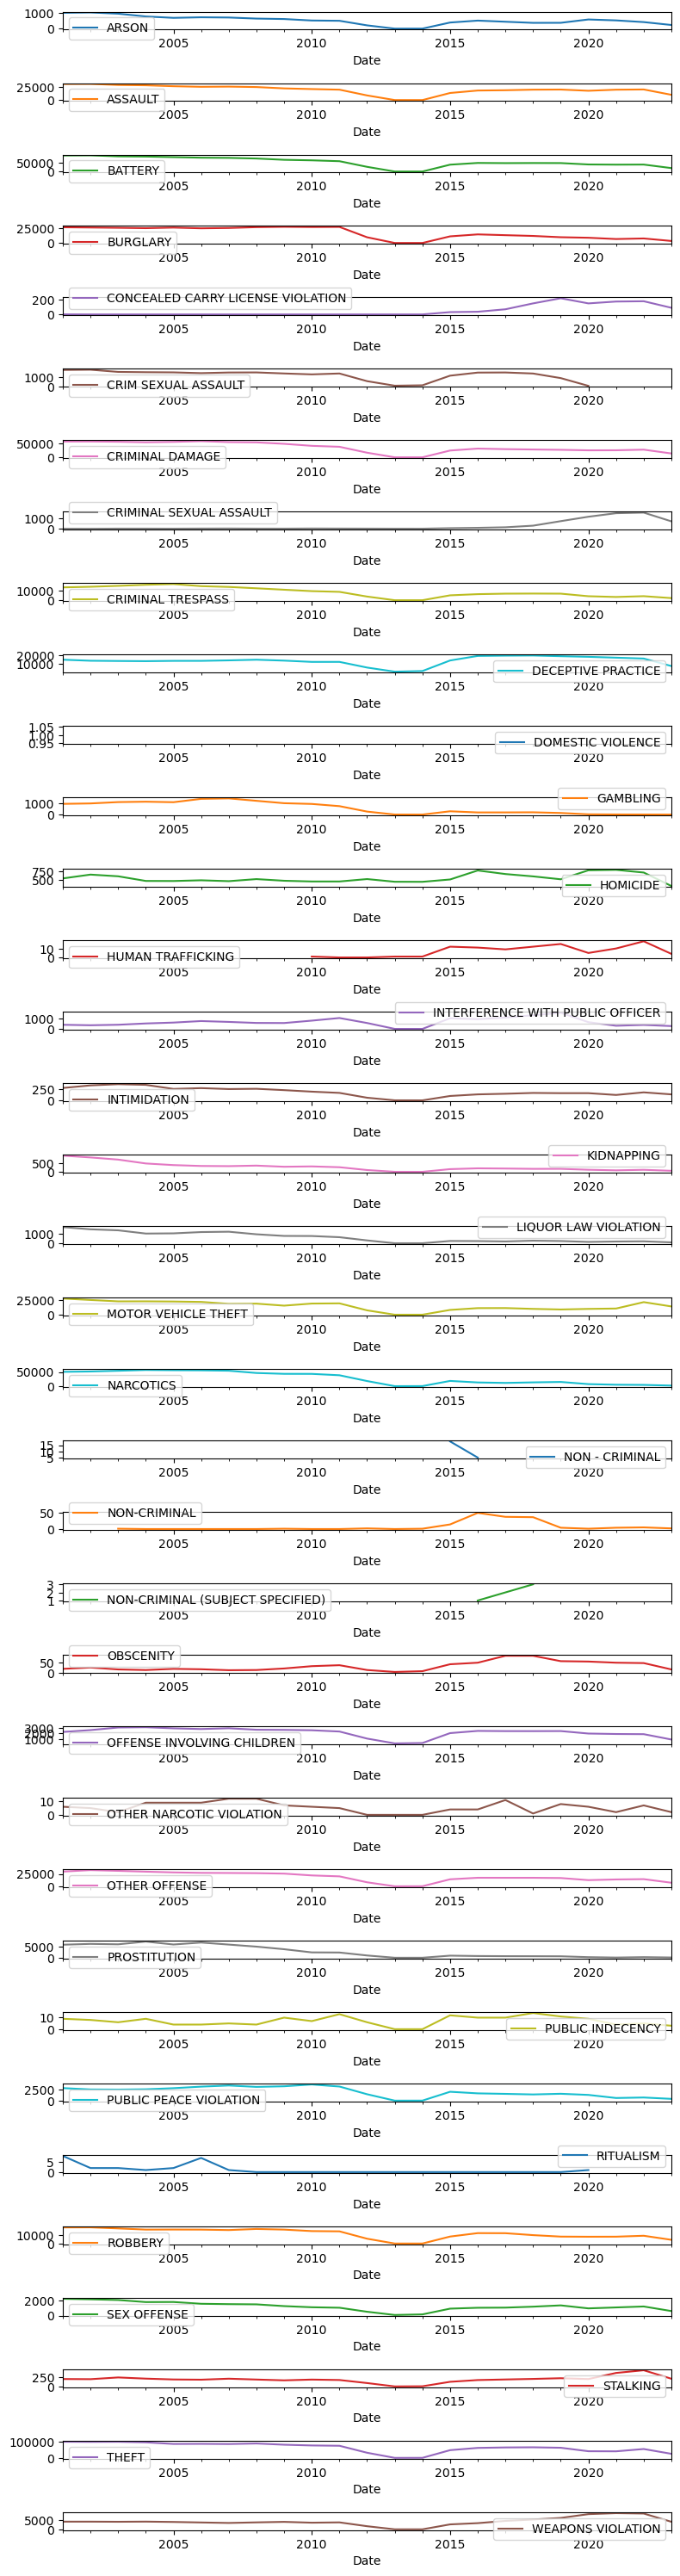

In [19]:
crime_year_type_unstacked.plot(subplots=True, sharex = False, sharey = False, 
                                                      layout=(-1,1), figsize=(8,30))
plt.tight_layout();

In [20]:
## Save to PNG
FOLDER = "PNG/"
fig.savefig(f'{FOLDER}/each-crime-by-year.png',bbox_inches='tight')

In [21]:
# convert the long-form to separate each primary type to a separate column
# pivot the result to have the datetime as the index and the crime as the columns
crime_year_type = crime_year_type.dropna()
crime_year_type_piv = crime_year_type.pivot(index = 'Date', columns = 'Primary Type')
crime_year_type_piv.head()

AttributeError: 'Series' object has no attribute 'pivot'

In [ ]:
# drop the first level of columns
crime_year_type_piv.columns = crime_year_type_piv.columns.droplevel(0)
crime_year_type_piv.head()

In [ ]:
# subtract to get delta crimes
change_crime_years = crime_year_type_piv.loc['2023-12-31'] - crime_year_type_piv.loc['2001-12-31']
change_crime_years

In [ ]:
# drop the missing values in change_crime_years
change_crime_years = change_crime_years.dropna().to_frame('Count')
change_crime_years = change_crime_years.sort_values(by = 'Count',ascending=False)
change_crime_years = change_crime_years.reset_index()
change_crime_years

There are three primary types of crime that have increased between 2001 and 2023 despite the overall trend of decrease in crime. They are
CRIMINAL SEXUAL ASSAULT, CONCEALED CARRY LICENSE VIOLATION and STALKING.

In [ ]:
# plot the changes
plt.rcParams['figure.figsize'] = (12,3)
fig, ax = plt.subplots()
sns.barplot(data=change_crime_years, x='Primary Type' ,y='Count')
ax.set_title('Change of crime by type from 2001 to 2023', fontsize=14, weight = 'bold')
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90, ha = 'center')

In [ ]:
## Save to PNG
FOLDER = "PNG/"
fig.savefig(f'{FOLDER}/change-crime-by-type.png',bbox_inches='tight')

# Topic 4) Comparing Months:


## What months have the most crime? What months have the least?


In [ ]:
# group by month
df_monthcount = resampled_df.copy()
df_monthcount['Month'] = df_monthcount.index.month
df_monthcount['MonthName'] = df_monthcount.index.month_name()
df_monthcount = df_monthcount.reset_index()
df_monthcount = df_monthcount.groupby(['Month','MonthName'])['Count'].sum().to_frame('Count')
df_monthcount = df_monthcount.reset_index()
df_monthcount.sort_values('Count',ascending=False)

The month of May and February have the highest and lowest number of crimes.

In [ ]:
# plot the changes
plt.rcParams['figure.figsize'] = (12,3)
fig, ax = plt.subplots()
sns.barplot(data=df_monthcount, x='Month' ,y='Count')
ax.set_title('Crime by Month', fontsize=14, weight = 'bold')
ax.set(xticklabels = (list(df_monthcount['MonthName'])))
ax.set_xlabel('')
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90, ha = 'center')

In [ ]:
## Save to PNG
FOLDER = "PNG/"
fig.savefig(f'{FOLDER}/crime-by-month.png',bbox_inches='tight')

## Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [ ]:
# create a yearly data and group by each Primary Type
# Resample the dataframe grouped by month
crime_mo_type = df.groupby(['Primary Type']).resample('MS')['Count'].sum().reset_index()
crime_mo_type['Month'] = crime_mo_type['Date'].dt.month
crime_mo_type['MonthName'] = crime_mo_type['Date'].dt.month_name()
crime_mo_type

In [ ]:
# group data
crime_mo_type = crime_mo_type.groupby(['Month','MonthName','Primary Type'])['Count'].sum().to_frame('Count')
crime_mo_type = crime_mo_type.reset_index()
crime_mo_type

In [ ]:
g = sns.catplot(data=crime_mo_type, x='Month', y='Count',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

In [ ]:
## Save to PNG
FOLDER = "PNG/"
fig.savefig(f'{FOLDER}/each-crime-by-month.png',bbox_inches='tight')

In [ ]:
crime_mo_type_piv = crime_mo_type.pivot(index = ['Month','MonthName'], columns = 'Primary Type')
crime_mo_type_piv

In [ ]:
# drop the first level of columns
crime_mo_type_piv.columns = crime_mo_type_piv.columns.droplevel(0)
crime_mo_type_piv = crime_mo_type_piv.reset_index()
crime_mo_type_piv

In [ ]:
# loop over all primary types
crime_type = list(crime_mo_type['Primary Type'].unique())
crime_type

In [ ]:
# create a df that has each primary type max and min and its month
result = pd.DataFrame()
for crime in crime_type:
    max_mo = crime_mo_type_piv['MonthName'].loc[crime_mo_type_piv[crime].idxmax()]
    min_mo = crime_mo_type_piv['MonthName'].loc[crime_mo_type_piv[crime].idxmin()]
    
    row = {
    "Primary Type": crime,
    "Max Month": max_mo,
    "Min Month": min_mo}
    
    result = result.append(row, ignore_index=True)
    
result

The pattern is May with highest whilst Feb with lowest and it is a mixed result. In fact, the dataframe above suggests that CRIMINAL DAMAGE, KIDNAPPING and WEAPONS VIOLATION completely follow the pattern.

Additionally, I plan to categorize the pattern as the end of winter and end of spring, then perhaps find more months that match the trend . 